In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('final_test.csv')
data.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
data['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

<AxesSubplot:xlabel='size', ylabel='count'>

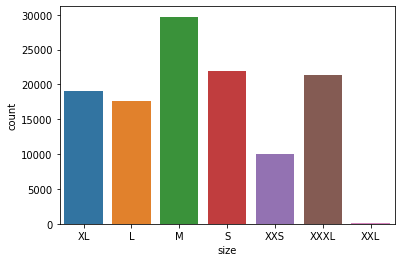

In [5]:
sns.countplot(x = data['size'])

<Figure size 9360x4320 with 0 Axes>

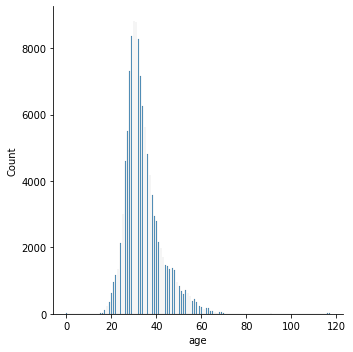

In [6]:
plt.figure(figsize=(130, 60))
sns.displot(data['age'])
plt.show()

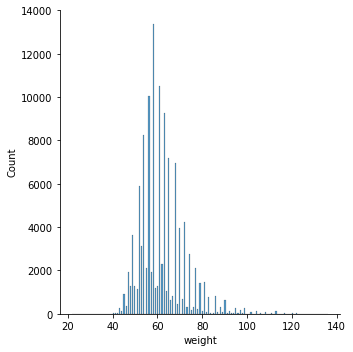

In [7]:
sns.displot(data["weight"])

In [8]:
# remove outliners
dfs = []
sizes = []
for size_type in data['size'].unique():
    sizes.append(size_type)
    ndf = data[['age','height','weight']][data['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)
    
for i in range(len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
data = pd.concat(dfs)
data.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [9]:
data.isnull().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

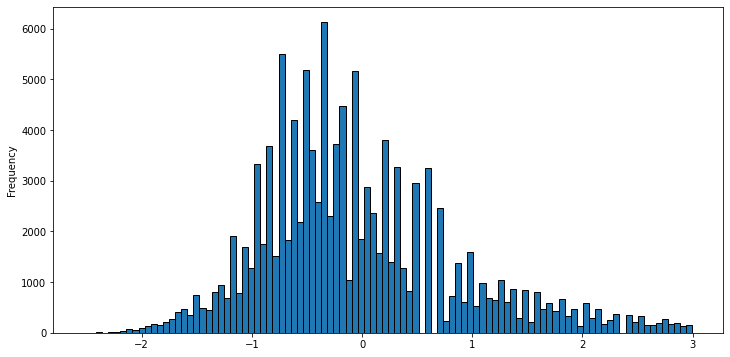

In [10]:
plt.figure(figsize=(12, 6))
plt.xlabel = 'values'
plt.ylabel = 'frequency'
data['age'].plot(kind='hist', ec='black', bins=100)
plt.show()

In [11]:
data.shape

(119734, 4)

In [12]:
# data.dropna(inplace=True)
data["age"] = data["age"].fillna(data['age'].median())
data["height"] = data["height"].fillna(data['height'].median())
data["weight"] = data["weight"].fillna(data['weight'].median())

In [13]:
data.isna().sum()
data = data.sample(frac=0.3)

<AxesSubplot:ylabel='Frequency'>

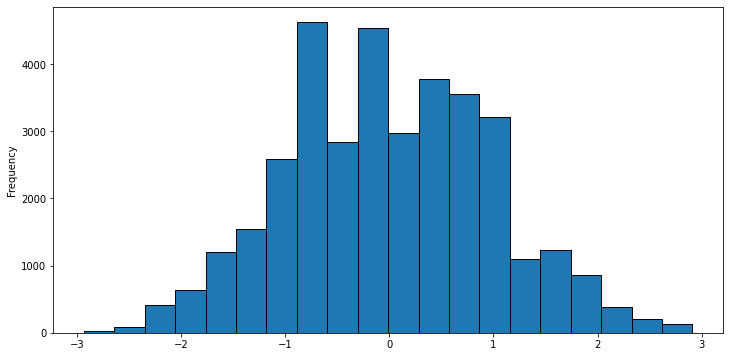

In [14]:
plt.figure(figsize=(12, 6))
data['height'].plot(kind='hist', ec='black', bins=20)

<AxesSubplot:ylabel='Frequency'>

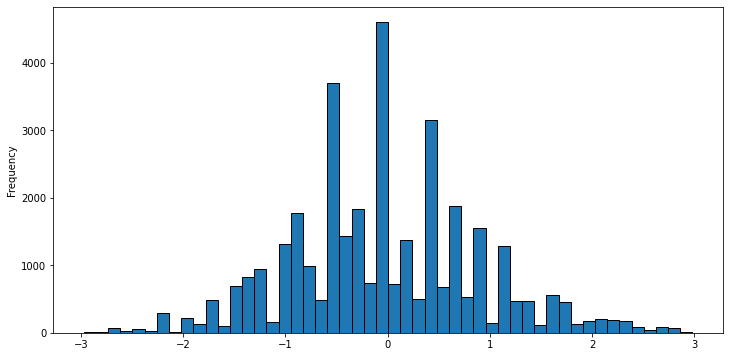

In [15]:
plt.figure(figsize=(12, 6))
data['weight'].plot(kind='hist', ec='black', bins=50)

In [16]:
# Mapping clothes size from strings to numeric
data['size'] = data['size'].map({"XXS": 1,
                                     "S": 2,
                                     "M" : 3,
                                     "L" : 4,
                                     "XL" : 5,
                                     "XXL" : 6,
                                     "XXXL" : 7})

data["bmi"] = data["height"]/data["weight"]
data["weight-squared"] = data["weight"] * data["weight"]

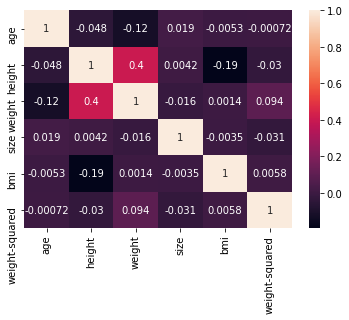

In [17]:
corr = sns.heatmap(data.corr(), annot=True)

In [18]:
data.isna().sum()

age               0
height            0
weight            0
size              0
bmi               0
weight-squared    0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X, y = data.drop('size', axis=1), data['size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, verbose=True, learning_rate=5)
model.fit(X_train, y_train, 
         eval_set=(X_test, y_test),
         plot=True)

learning rate is greater than 1. You probably need to decrease learning rate.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.6337575	test: 3.5631289	best: 3.5631289 (0)	total: 181ms	remaining: 18s
1:	learn: 366.1872182	test: 364.1696419	best: 3.5631289 (0)	total: 333ms	remaining: 16.3s
2:	learn: 1181.9765995	test: 1168.4565117	best: 3.5631289 (0)	total: 415ms	remaining: 13.4s
3:	learn: 2226.6903279	test: 2172.3924547	best: 3.5631289 (0)	total: 478ms	remaining: 11.5s
4:	learn: 3009.2957416	test: 2998.6959013	best: 3.5631289 (0)	total: 539ms	remaining: 10.2s
5:	learn: 3214.1418308	test: 3256.5047768	best: 3.5631289 (0)	total: 645ms	remaining: 10.1s
6:	learn: 3059.0232099	test: 3096.5987605	best: 3.5631289 (0)	total: 713ms	remaining: 9.47s
7:	learn: 1708.9676059	test: 1738.3997792	best: 3.5631289 (0)	total: 768ms	remaining: 8.84s
8:	learn: 1696.7507487	test: 1692.4462443	best: 3.5631289 (0)	total: 823ms	remaining: 8.32s
9:	learn: 1674.8218874	test: 1719.6779924	best: 3.5631289 (0)	total: 872ms	remaining: 7.85s
10:	learn: 1143.4112676	test: 1162.3675920	best: 3.5631289 (0)	total: 946ms	remaining: 7.6

95:	learn: 96.1726365	test: 108.0454805	best: 3.5631289 (0)	total: 6.93s	remaining: 289ms
96:	learn: 112.2820041	test: 117.0489946	best: 3.5631289 (0)	total: 6.99s	remaining: 216ms
97:	learn: 107.2926487	test: 113.7720080	best: 3.5631289 (0)	total: 7.04s	remaining: 144ms
98:	learn: 103.3114443	test: 112.2428184	best: 3.5631289 (0)	total: 7.09s	remaining: 71.7ms
99:	learn: 112.4578528	test: 125.1580050	best: 3.5631289 (0)	total: 7.18s	remaining: 0us

bestTest = 3.563128869
bestIteration = 0

Shrink model to first 1 iterations.


In [21]:
data.shape

(35920, 6)

In [22]:
model.score(X_test, y_test)

0.4223273942093541

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
model3.score(X_test, y_test)

0.9924832962138085

In [26]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()

In [27]:
model4.fit(X_train, y_train)

c:\users\qodirjon\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
model4.score(X_test, y_test)

0.2458240534521158

In [29]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()

In [30]:
model5.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
model5.score(X_test, y_test)

0.9969376391982183

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
model6.score(X_test,y_test)

0.7764476614699332

In [34]:
from sklearn.neural_network import MLPClassifier
model7 = MLPClassifier()

In [35]:
model7.fit(X_train,y_train)

c:\users\qodirjon\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [36]:
model7.score(X_test,y_test)

0.44974944320712695

In [37]:
model2.predict(X_test)

NameError: name 'model2' is not defined

In [39]:
model3.predict([[70, 20, 185]])


ValueError: X has 3 features, but DecisionTreeClassifier is expecting 5 features as input.